## Введение и импорт данных

In [ ]:
!pip install dtreeviz

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import dtreeviz
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import roc_curve, auc, confusion_matrix

In [ ]:
employees = pd.read_csv("https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_03_visualization/Employee.csv")
employees

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [ ]:
employees.PaymentTier.value_counts()

3    3492
2     918
1     243
Name: PaymentTier, dtype: int64

In [ ]:
employees = employees[employees['PaymentTier'] != 1]

## Предварительная модификация данных

In [ ]:
employees['Gender'] = employees['Gender'].apply(lambda x: 1 if x=='Female' else 0)

In [ ]:
employees['EverBenched'] = employees['EverBenched'].apply(lambda x: 1 if x=='Yes' else 0)

In [ ]:
employees['Education'] = employees['Education'].apply(lambda x: 0 if x=='Bachelors' else 1 if x=='Masters' else 2)

In [ ]:
employees

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,Bangalore,3,34,0,0,0,0
1,0,2013,Pune,1,28,1,0,3,1
2,0,2014,New Delhi,3,38,1,0,2,0
3,1,2016,Bangalore,3,27,0,0,5,1
4,1,2017,Pune,3,24,0,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,Bangalore,3,26,1,0,4,0
4649,1,2013,Pune,2,37,0,0,2,1
4650,1,2018,New Delhi,3,27,0,0,5,1
4651,0,2012,Bangalore,3,30,0,1,2,0


## Задание 1 (разминочное)
Постройте матрицу корреляций для всех числовых переменных.
Используйте seaborn.heatmap для визуализации парных корреляций между числовыми переменными.
Проанализируйте, как уровень образования, опыт работы, возраст и гендерная принадлежность связаны с вероятностью увольнения.
Постройте scatterplots для визуализации этих зависимостей.

In [ ]:

num_vars = ['Education', 'JoiningYear', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot']

<Axes: >

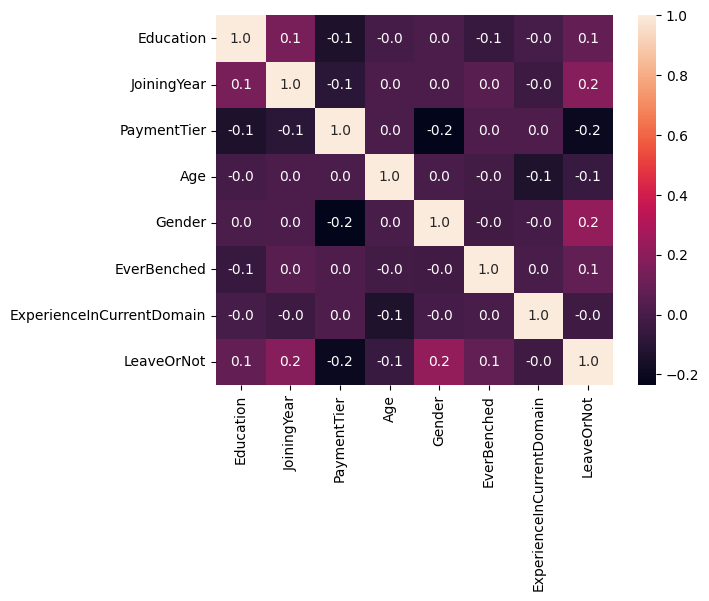

In [ ]:
sns.heatmap(employees[num_vars].corr(), annot=True, fmt='.1f')

Проанализируйте, как уровень образования, опыт работы, возраст и гендерная принадлежность связаны с вероятностью увольнения. Постройте scatterplots для визуализации этих зависимостей.

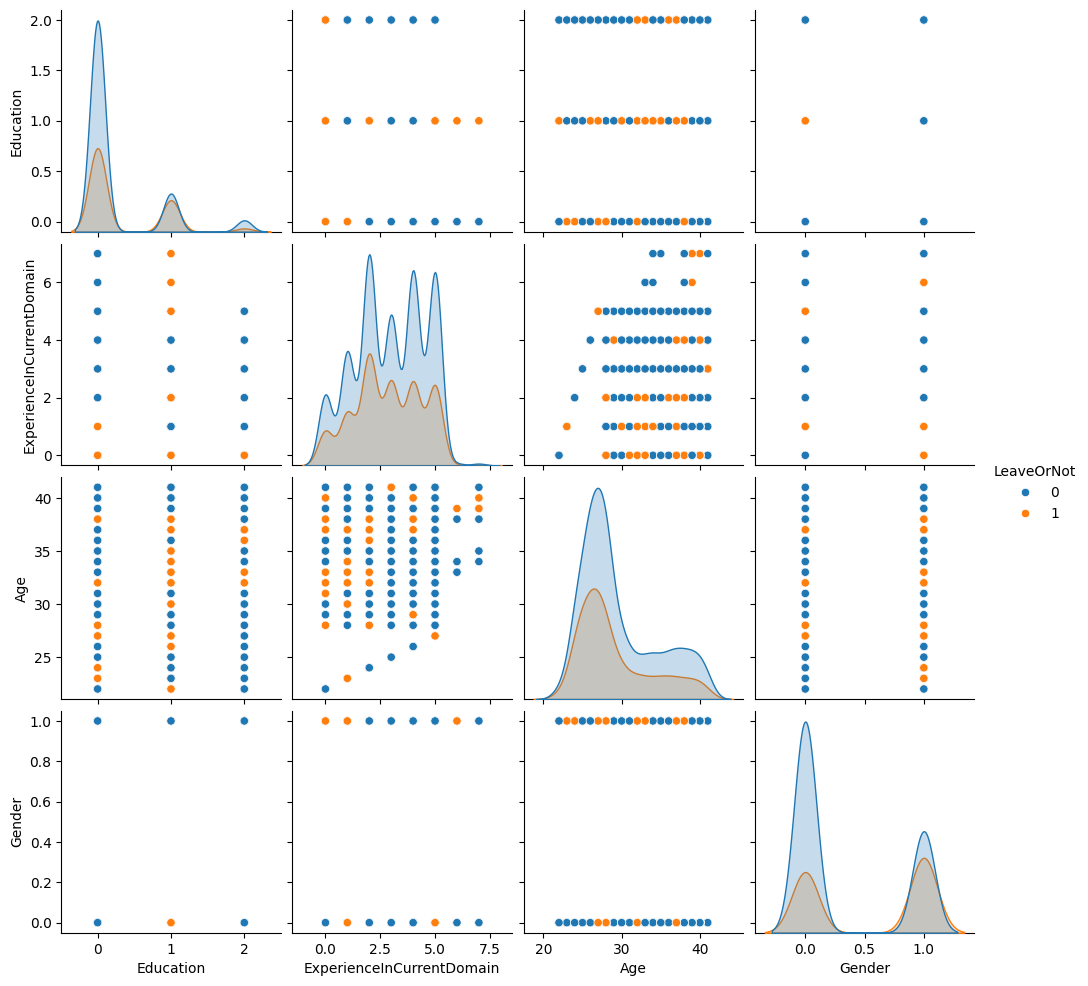

In [ ]:
sns.pairplot(employees[['Education', 'ExperienceInCurrentDomain', 'Age', 'Gender', 'LeaveOrNot']], hue='LeaveOrNot')

## Задание 2.

Постройте три разных алгоритма машинного обучения: KNN, Logistic Regression, Decision Tree. Используйте в качестве зависимой переменной PaymentTier, а в качестве независимых - все численные переменные в датасете.
Для каждого алгоритма постройте кривую ROC и confusion_matrix.
Постройте 6 графиков на одном поле с помощью plt.subplots(), также выведите текст с информацией какая модель самая эффективная (с точки зрения выбитого качества)

In [ ]:
X = employees[num_vars].drop('PaymentTier', axis=1)
y = employees['PaymentTier']

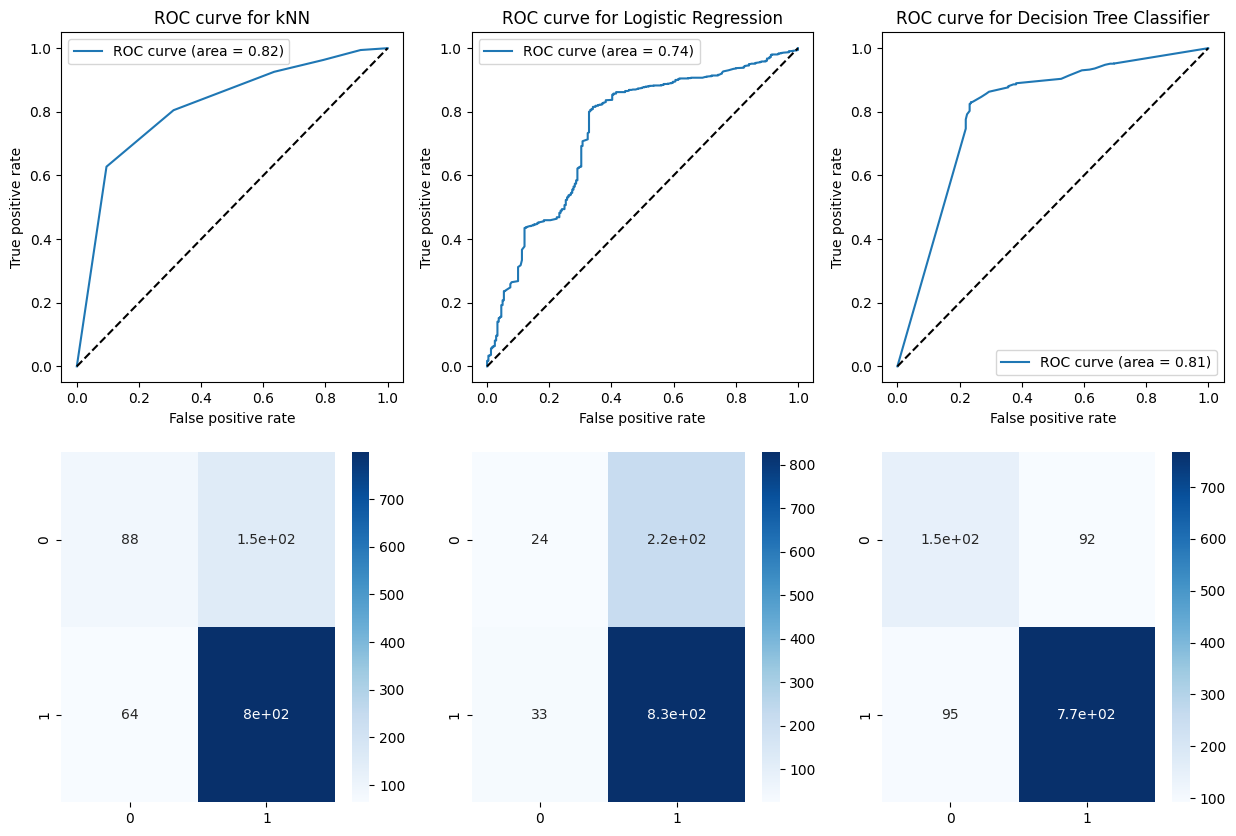

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


algorithms = [KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier()]
names = ['kNN', 'Logistic Regression', 'Decision Tree Classifier']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(len(algorithms)):
  clf = algorithms[i]
  model = clf.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_prob = model.predict_proba(X_test)[:, 1]
  x_roc, y_roc, thresholds = roc_curve(y_test, y_prob, pos_label=3)
  roc_auc = auc(x_roc, y_roc)
  cm = confusion_matrix(y_test, y_pred)


  axs[0, i].plot(x_roc, y_roc, label=f'ROC curve (area = {roc_auc:.2f})')
  axs[0, i].plot([0, 1], [0, 1], color='black', linestyle='--')
  axs[0, i].legend()
  axs[0, i].set_xlabel("False positive rate")
  axs[0, i].set_ylabel("True positive rate")
  axs[0, i].set_title(f"ROC curve for {names[i]}")
  sns.heatmap(cm, annot=True, cmap='Blues', ax=axs[1, i])



## Задание 3.

Проанализируйте, как город работы влияет на вероятность увольнения.

### Задание 3.1
Сравните качество моделей, построенных для разных городов.


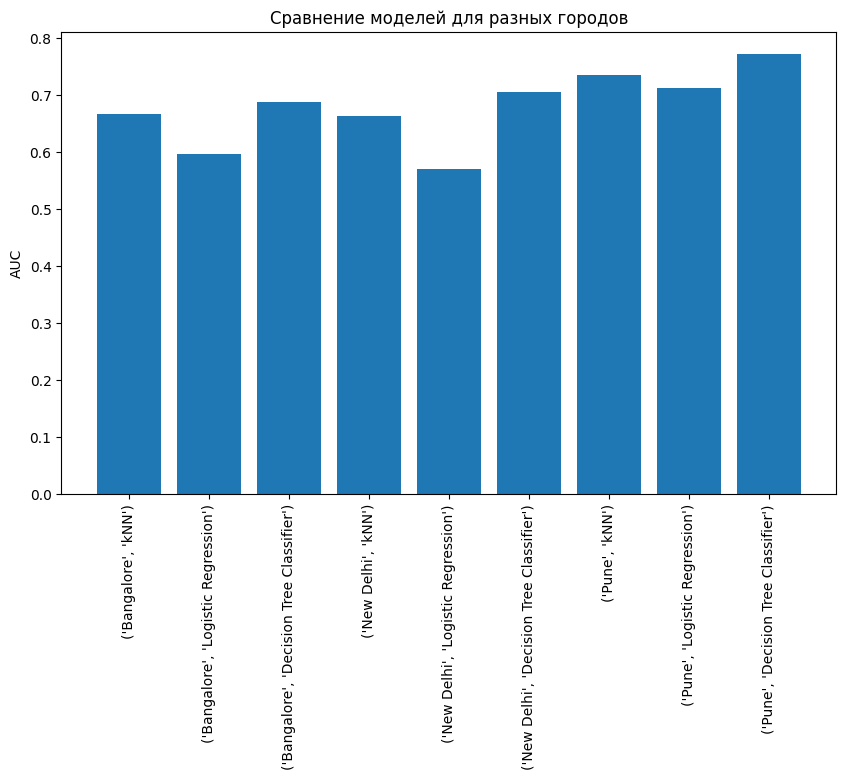

In [ ]:
# Импортируем библиотеки
import sklearn
import matplotlib.pyplot as plt

algorithms = [sklearn.neighbors.KNeighborsClassifier(), sklearn.linear_model.LogisticRegression(), sklearn.tree.DecisionTreeClassifier()]

results = {}

for city in employees["City"].unique():
  df_city = employees[employees["City"] == city]

  X = df_city.drop(["Education", "City", "Gender", "EverBenched", "LeaveOrNot"], axis=1)
  y = df_city["LeaveOrNot"]

  X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

  for i, algorithm in enumerate(algorithms):
    algorithm.fit(X_train, y_train)
    y_pred = algorithm.predict_proba(X_test)[:, 1]
    auc = sklearn.metrics.roc_auc_score(y_test, y_pred)
    results[(city, names[i])] = auc

plt.figure(figsize=(10, 6))
plt.bar(range(len(results)), list(results.values()), align="center")
plt.xticks(range(len(results)), list(results.keys()), rotation=90)
plt.ylabel("AUC")
plt.title("Сравнение моделей для разных городов")
plt.show()


### Задание 3.2

Определите, в каком городе шансы на увольнение выше/ниже.

<ipython-input-66-4cb86662de82>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0, 0.5, 'Probability to be fired')

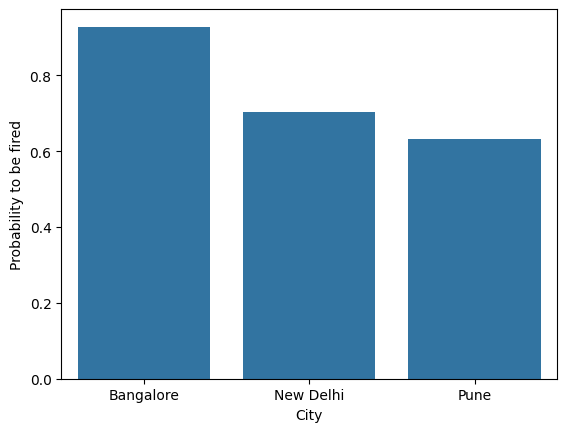

In [ ]:
model = DecisionTreeClassifier()

model.fit(X, y)

probs = model.predict_proba(X)[:, 1]

employees['ProbLeave'] = probs

mean_probs = employees.groupby('City')['ProbLeave'].mean()

sns.barplot(mean_probs)
plt.xlabel('City')
plt.ylabel('Probability to be fired')


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_03_visualization/apple_quality.csv").iloc[:-1, 1:]

In [ ]:
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


## Задание 4.

### Задание 4.1
Создайте алгортим, который будет попарно перебирать все переменные и строить для этих пар модель kNN, после перебора всех моделей выведет пару с наибольшим качеством полученной модели.

In [ ]:
import itertools
for i in itertools.combinations(X.columns, 2):
  print(i)

('Size', 'Weight')
('Size', 'Sweetness')
('Size', 'Crunchiness')
('Size', 'Juiciness')
('Size', 'Ripeness')
('Size', 'Acidity')
('Weight', 'Sweetness')
('Weight', 'Crunchiness')
('Weight', 'Juiciness')
('Weight', 'Ripeness')
('Weight', 'Acidity')
('Sweetness', 'Crunchiness')
('Sweetness', 'Juiciness')
('Sweetness', 'Ripeness')
('Sweetness', 'Acidity')
('Crunchiness', 'Juiciness')
('Crunchiness', 'Ripeness')
('Crunchiness', 'Acidity')
('Juiciness', 'Ripeness')
('Juiciness', 'Acidity')
('Ripeness', 'Acidity')


In [ ]:


X = df.drop("Quality", axis=1)
y = df["Quality"]

model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)

results = []

for pair in itertools.combinations(X.columns, 2):
  X_pair = X[list(pair)]
  X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_pair, y, test_size=0.2, random_state=42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)

  results.append((pair, accuracy))
results.sort(key=lambda x: x[1], reverse=True)

print(f"Лучшая пара признаков: {results[0][0]}")
print(f"Точность модели: {results[0][1]:.3f}")


Лучшая пара признаков: ('Size', 'Ripeness')
Точность модели: 0.642


### Задание 4.2.

Создайте линейный график изменения качества модели при увеличении количества соседей для алгоритма kNN для количества соседей от 1 до 10.

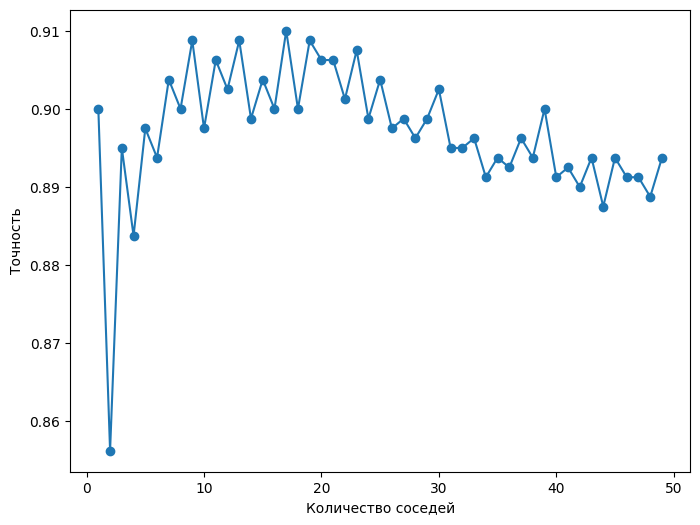

In [ ]:
X = df.drop('Quality', axis=1)
y = df['Quality']

results = []

for n in range(1, 50):
  model = KNeighborsClassifier(n_neighbors=n)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  results.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 50), results, marker='o')
plt.xlabel('Количество соседей')
plt.ylabel('Точность')
plt.show()